<a href="https://colab.research.google.com/github/nayoung718/essa_python_1/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_1~3_%ED%95%84%EC%82%AC_50_~_86p.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 딥러닝 텐서플로 ch3.1 ~ 3 필사 50 ~ 86p

## 딥러닝 준비

1-1 주요 용어

1-1-1 하이퍼 파라미터 : 학습 속도나 반복 훈련 횟수 등 사용자가 직접 설정해야하는 값

1-1-2 과소적합 vs 과대적합 : 과소적합(모델 충분히 학습 안된경우), 과대적합(지나치게 반복학습되에 과하게 적합된 경우-예측데이터에 대한 예측 오차 발생)

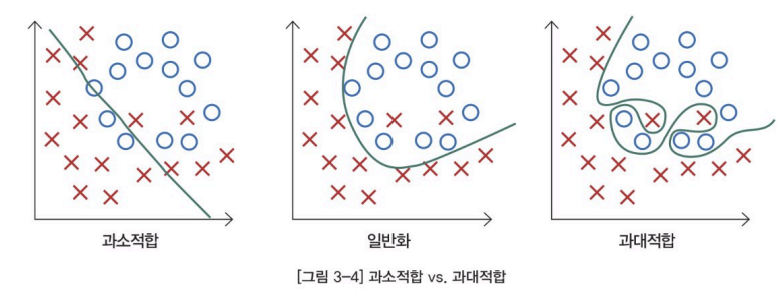


1-1-3 에포크 : 딥러닝 모델이 반복훈련을 할 떄 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프

1-1-4 손실함수 : 예측값과 정답값의 차이 또는 오차

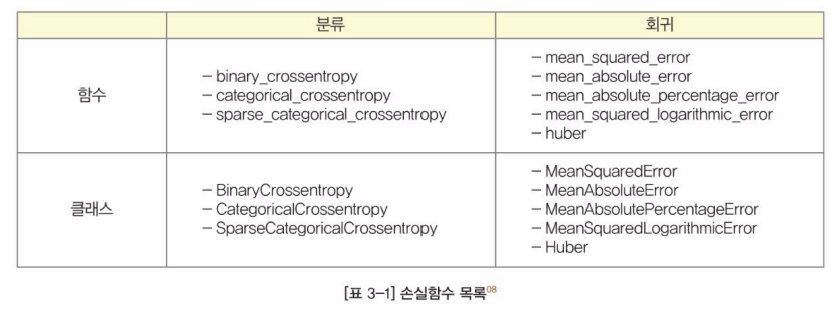

In [1]:
#클래스및 함수형태로 정의되어있는 손실함수 지정해 사용
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()

#함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

1-1-5 경사하강법 : 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소함수값을 갖도록 하는 방법

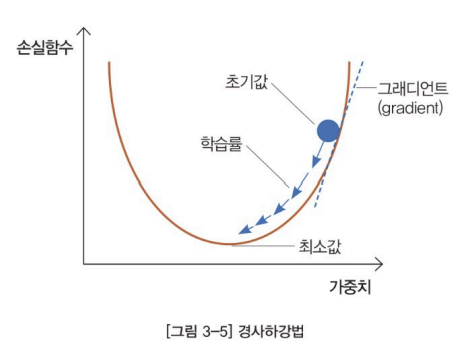

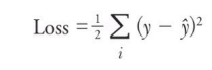

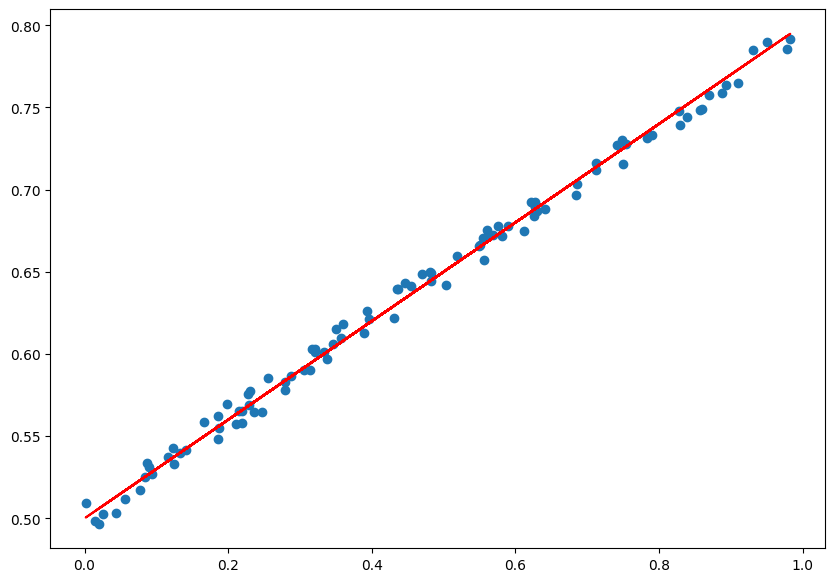

w:0.3,b:0.5


In [2]:
#경사하강법
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8,size=50,noise=1.0):
  x = np.random.rand(size)
  y = w*x + b
  noise=np.random.uniform(-abs(noise),abs(noise),size=y.shape)
  yy=y+noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y={w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y=make_linear(w=0.3,b=0.5,size=100,noise=0.01)

약간의 노이즈 추가되어있는것 확인 가능

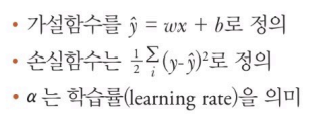

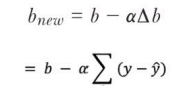

In [3]:
#넘파이로 최적화 과정 구현
#최대 반복 횟수
num_epoch=1000

#학습률(learning_rate)
learning_rate=0.005

#에러 기록
errors=[]

#random한 값으로 w,b 초기화
w=np.random.uniform(low=0.0,high=1.0)
b=np.random.uniform(low=0.0,high=1.0)

for epoch in range(num_epoch):
  #hypothesis 정의
  y_hat=w*x+b

  #loss function 정의
  error=0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  #gradient 미분 계산
  w=w-learning_rate*((y_hat-y)*x).sum()
  b=b-learning_rate*(y_hat-y).sum()
  errors.append(error)
  if epoch%5==0:
    print("{0:2} w= {1:.5f}, b={2: .5f} error = {3: .5f}".format(epoch,w,b,error))

print("====="*15)
print("{0:2} w= {1:.1f}, b={2: .1f} error = {3: .5f}".format(epoch,w,b,error))

 0 w= 0.68016, b= 0.55629 error =  18.46931
 5 w= 0.54801, b= 0.38371 error =  0.24530
10 w= 0.51227, b= 0.39858 error =  0.18107
15 w= 0.48222, b= 0.41290 error =  0.13463
20 w= 0.45637, b= 0.42524 error =  0.10022
25 w= 0.43411, b= 0.43587 error =  0.07472
30 w= 0.41495, b= 0.44502 error =  0.05582
35 w= 0.39845, b= 0.45290 error =  0.04181
40 w= 0.38425, b= 0.45968 error =  0.03143
45 w= 0.37202, b= 0.46551 error =  0.02373
50 w= 0.36149, b= 0.47054 error =  0.01803
55 w= 0.35243, b= 0.47486 error =  0.01380
60 w= 0.34463, b= 0.47859 error =  0.01067
65 w= 0.33792, b= 0.48180 error =  0.00835
70 w= 0.33213, b= 0.48456 error =  0.00663
75 w= 0.32716, b= 0.48693 error =  0.00535
77 w= 0.3, b= 0.5 error =  0.00494


<function matplotlib.pyplot.show(close=None, block=None)>

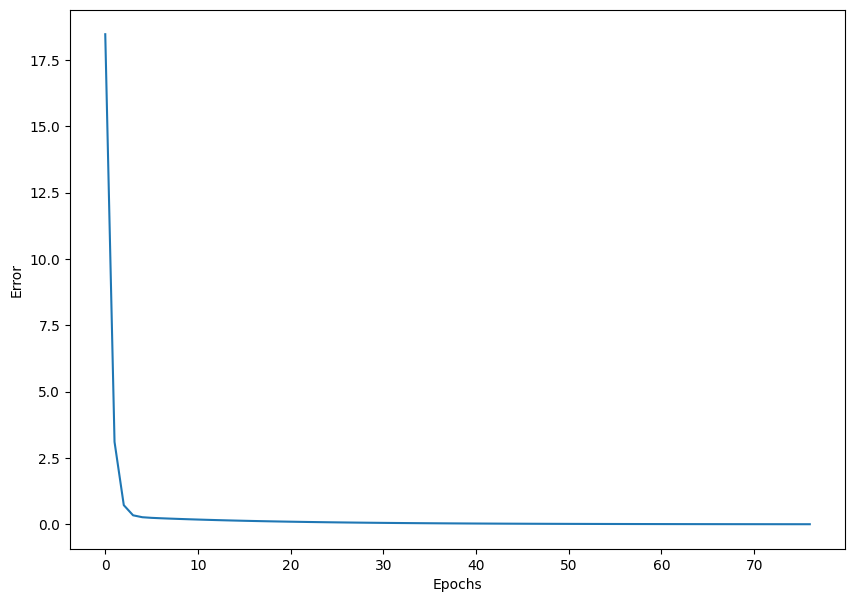

In [4]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show

가중치가 난수값에 의해 다르게 초기호되어 매번 실행떄마다 수렴 속도 차이 존재 -> 목표 오차범위 안으로 수렴해 반복문 종료

1-2 딥러닝 프로세스

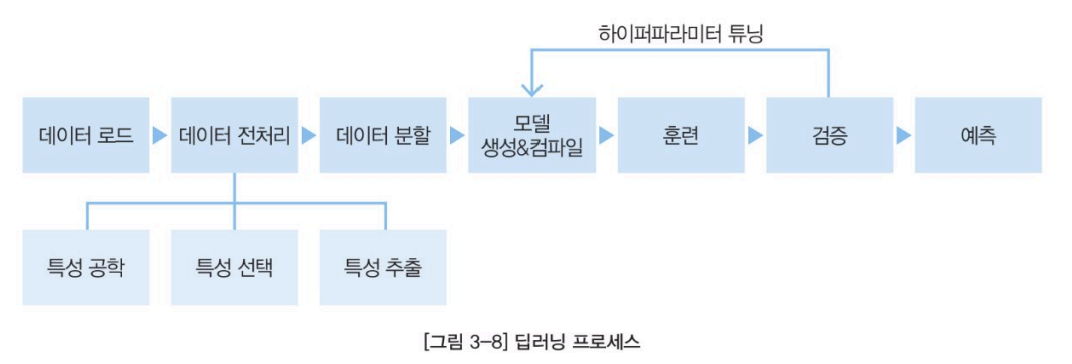

1-2-1 데이터 전처리 : 데이터 가공 (종류, 문제유형따라)

1-2-2 모델 생성 : 순차적구조 모델(sequential api), 다중 입력 및 출력 가지고 복잡한 구조 모델 (functional api / model subclassing)

1-2-3 모델 컴파일 : 모델 인스턴스에 compile() 메소드를 적용하고 손실함수, 옵티마이저, 평가지표 등 여러 속성값 설정

1-2-4 모델 훈련 : fit() -> 훈련 데이터셋, 검증 데이터셋, epoch, 배치 크기 및 콜백 함수 지정

1-2-5 모델 검증 : 모델 훈련할 때 사용하지 않은 검증 데이터셋을 모델에 입력하고 모델 예측값을 정답과 비교하여 평가지표 계산

1-2-6 모델 예측 : 모델 예측 후 결과 반환



2 단순 신경망 훈련

2-1 선형회귀 : y=wx+b (w 가중치, b 편향)

2-2 뉴런 : 인공신경망 모델 구성하는 하나의 신경 (노드)

2-3 Dense 레이어 : 각 레이어 사이 모든 뉴런 서로 연결되어 있으 완전 연결층 이라고 부름

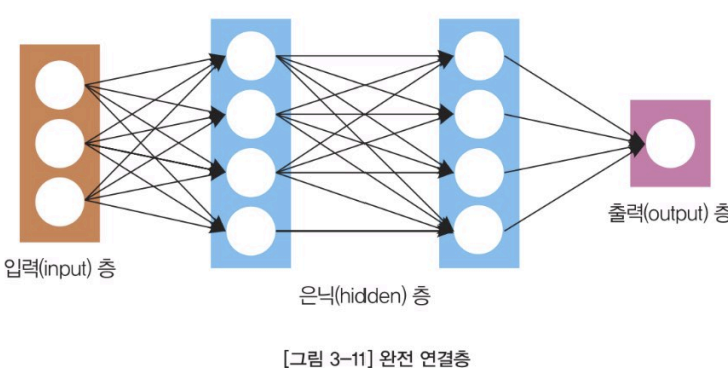


In [5]:
import tensorflow as tf

#10개의 노드로 이루어진 dense 레이어
tf.keras.layers.Dense(10)

#Relu 활성화함수 적용
tf.keras.layers.Dense(10,activation='relu')

2-4 데이터셋 만들기

In [6]:
#샘플 데이터셋 생성
x=np.arange(1,6)

#y=3x+2
y=3*x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


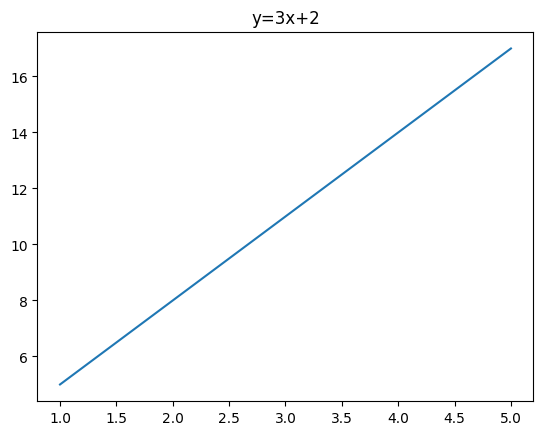

In [7]:
import matplotlib.pyplot as plt

#시각화
plt.plot(x,y)
plt.title('y=3x+2')
plt.show()

2-5 sequential api

층을 이어붙이듯 시퀀스에 맞게 일렬로 연결하는 방식 : 입력 -> 출력 레이어

2-5-1 모델구조


In [8]:
#dense 레이어 3개 갖는 모델 생성
import tensorflow as tf

#리스트형
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

In [9]:
#add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

2-5-2 입력 데이터 형태

sequential api 사용시 모델 구성 첫번째 층은 input_shape 매개변수 지정 필요

In [10]:
import tensorflow as tf
model = tf.keras.Sequential([
    #입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10,input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

2-5-3 단순선형회귀 모델 정의

In [11]:
#단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

2-6 모델 요약

In [12]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2-7 컴파일 : 옵티마이저, 손실함수, 평가지표 지정

In [14]:
#긴문자열 지정
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['mean_squared_error','mean_absolute_error'])

#짧은문자열 지정
model.compile(optimizer='sgd',loss='mse',metrics=['mse','mae'])

#클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.MeanAbsoluteError(),tf.keras.metrics.MeanSquaredError()])

In [15]:
#컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

2-8 훈련

verbose=0 : 훈련 중관과정 출력 안함

In [16]:
#훈련
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 774ms/step - loss: 187.4515 - mae: 12.7238
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 109.3032 - mae: 9.7501
Epoch 3/5
1/1 [==============================] - 0s 27ms/step - loss: 63.7618 - mae: 7.4799
Epoch 4/5
1/1 [==============================] - 0s 15ms/step - loss: 37.2220 - mae: 5.7467
Epoch 5/5
1/1 [==============================] - 0s 42ms/step - loss: 21.7556 - mae: 4.4236


In [17]:
#단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

#훈련
model.fit(x,y,epochs=1200,verbose=0)

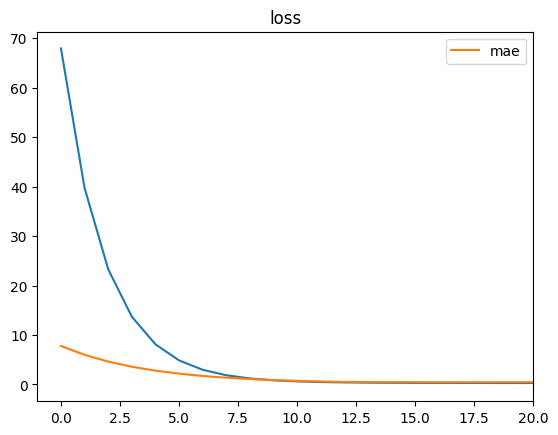

In [18]:
import matplotlib.pyplot as plt

#20epoch까지 loss 수렴에 대한 시각화
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('loss')
plt.legend()
plt.show()

2-9 검증



In [19]:
 #검증
 model.evaluate(x,y)

1/1 [==============================] - 0s 277ms/step - loss: 9.9633e-05 - mae: 0.0086


[9.963256161427125e-05, 0.008567333221435547]

2-10 예측

In [20]:
# 예측
model.predict([10])

1/1 [==============================] - 1s 553ms/step


array([[32.04141]], dtype=float32)

3. 심층 신경망으로 이미지 분류

3-1 케라스 내장 데이터셋 로드

- boston_housing, cifar10, cifar100, mnist, fashion_mnist, imdb, reuters

In [21]:
import tensorflow as tf

#케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [22]:
#load-data()로 데이터셋 로드
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
#로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


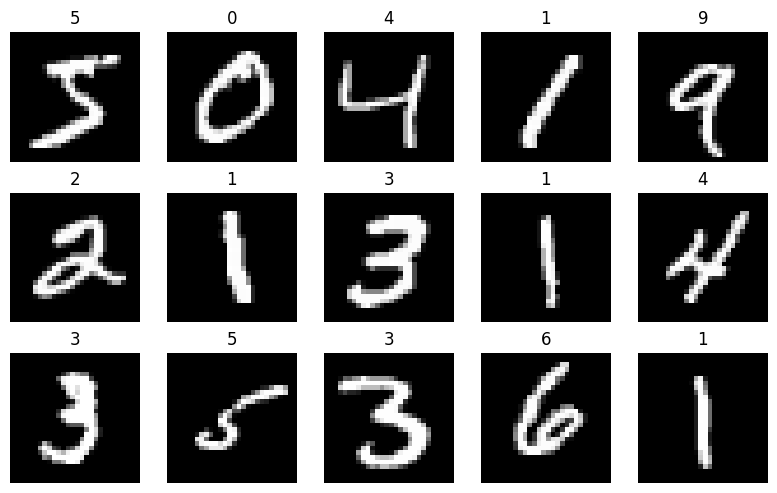

In [27]:
#데이터 시각화
import matplotlib.pyplot as plt


#canvas 생성
fig,axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax=axes[i//5][i%5]
  #imshow로 이미지 시각화
  ax.imshow(x_train[i],cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))
plt.tight_layout()
plt.show()

3-2 데이터 전처리

In [28]:
#x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [29]:
#픽셀값의 최소/최대값 확인
print(f'정규화전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

#데이터 정규화
x_train = x_train/x_train.max()

#정규화후 최소/최대값 확인
print(f'정규화후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화전] 최소값: 0, 최대값: 255
정규화후] 최소값: 0.0, 최대값: 1.0


In [30]:
#test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [31]:
# 변환후 x_trian 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

3-3 flatten 레이어

정규화해도 개별 데이터값 범위 축소되지만 원본 배열 형태 유지

In [32]:
print(f'변경 전 shape:{x_train.shape}')
print(f'1d로 shape 변경후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
1d로 shape 변경후: (60000, 784)


In [33]:
print(f'변경 전 shape:{x_train.shape}')

#flatten 레이어 적용 후 shape 확인
print(f'flatten 적용후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
flatten 적용후: (60000, 784)


3-4 활성화 함수 : 입력을 비선형 출력으로 변환해주는 함수

시그모이드, 하이퍼볼릭 탄젠트, relu, leaky relu

In [34]:
#dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(10,activation='relu')

In [35]:
#dense 레이어와 relu 활성화 함수 레이어 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

3-5 입력과 출력


In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    #노드 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10,activation='softmax')
])

In [37]:
#출력층 노드 =1 인경우, sigmoid
tf.keras.layers.Dense(1,activation='sigmoid')

#출력층 노드=2개 이상인 경우, softmax
tf.keras.layers.Dense(10,activation='softmax')

3-6 손실함수

In [38]:
#이진분류(출력노드개수=1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [39]:
#y가 원핫벡터인 경우
#[0 .. 0.. 1.. 0..]
model.compile(loss='categorical_crossentropy')
#y가 원핫벡터가 아닌 경우
#[5]
model.compile(loss='sparse_categorical_crossentropy')

3-7 옵티마이저 : 손실 낮추기 위해 신경망의 가중치와 학습률같은 신경망의 속성을 변경하는데 사용되는 최적화 방법 -> Adam, SGD, Adagrad, Nadam, RMSprop, Adadelta, Adamax, Ftrl

In [40]:
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

3-8 평가지표 : accuracy, auc, precision, recall

In [41]:
#클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=[acc])

#문자열로 지정
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

3-9 훈련


In [42]:
#훈련
model.fit(x_train,y_train,
          #검증셋지정
          validation_data=(x_test,y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 10ms/step - loss: 0.2283 - accuracy: 0.9313 - val_loss: 0.1579 - val_accuracy: 0.9505
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0952 - accuracy: 0.9706 - val_loss: 0.0830 - val_accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0676 - accuracy: 0.9791 - val_loss: 0.0915 - val_accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0510 - accuracy: 0.9833 - val_loss: 0.0860 - val_accuracy: 0.9741
Epoch 5/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0400 - accuracy: 0.9876 - val_loss: 0.0709 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0852 - val_accuracy: 0.9783
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0790 - v

3-10 평가

In [43]:
#검증
test_loss, test_acc = model.evaluate(x_test,y_test)
print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1006 - accuracy: 0.9756
검증셋 정확도: 0.975600004196167


3-11 예측

In [44]:
#예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [45]:
#예측 결과 출력
predictions[0]

array([2.5215238e-12, 1.3426778e-08, 2.2617552e-11, 2.1960657e-10,
       6.2692343e-13, 6.6799640e-15, 3.0729503e-16, 9.9999994e-01,
       3.7153389e-14, 1.2324270e-09], dtype=float32)

In [46]:
import numpy as np

#0번 index에 대해 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))

7
[7 2 1 0 4 1 4 9 6 9]


<function matplotlib.pyplot.show(close=None, block=None)>

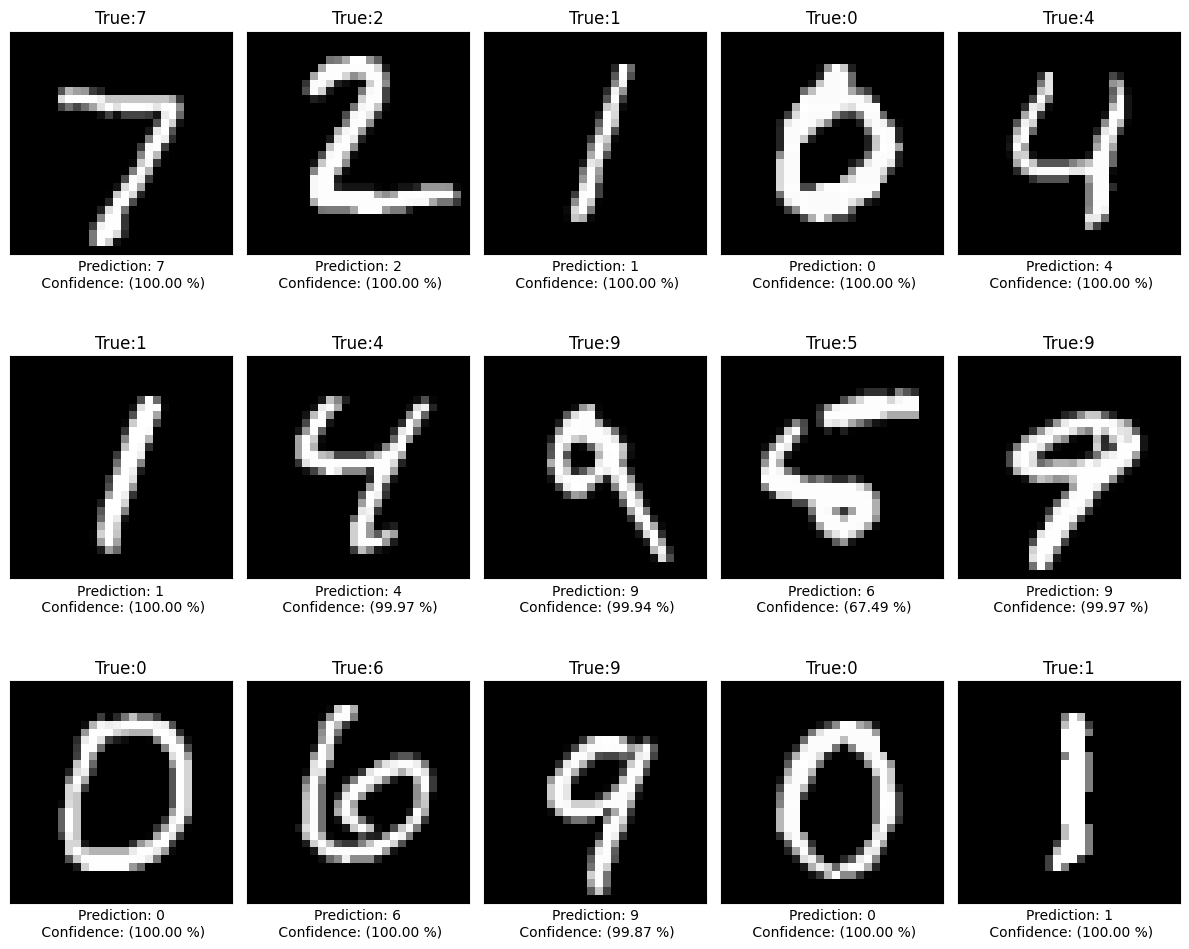

In [48]:
#데이터 시각화
import matplotlib.pyplot as plt

def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

#canvas 생성
fig,axes = plt.subplots(3,5)
fig.set_size_inches(12,10)

for i in range(15):
  ax=axes[i//5][i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  #imshow로 이미지 시각화
  ax.imshow(img,cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True:{y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\n Confidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show